# Week 7 - Machine Learning practical

## Questions for investigation  
  
  We'll be exploring the netflix-rotten-tomatoes-metacritic-imdb.csv dataset we were working with last week.  
    
We know that our client is interested in winning awards, and we've tried analysing the data to find patterns using simple relationships between the variables.   

Now we're going to see if machine learning can come up with any insights. To do that, we need to reshape the questions we want answers to.  

Now we ask:

1. What factors appear to affect the number of awards won by a movie?  
2. Of those factors, which carry the most weight?

In [13]:
# import the modules we will need to use 
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning models and utilities 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression



## Fetching and shaping our data 
  
Different machine learning models need the input data shaped in specific ways.  
In general, a supervised model needs:
* Numeric values for the variables,  
* A target variable (the 'answer' we're looking for).  

The target variable is the class or category we want to detect, in this case whether or not a movie has won any awards.

### Import the data

In [14]:
# import dataset 
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/jargonautical/bsuBootcampCohort4/refs/heads/main/week3/netflix-rotten-tomatoes-metacritic-imdb.csv")

### Inspect the data

In [15]:
df.columns
#df.head()
#df.sample()
#df.describe()

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Country Availability', 'Runtime', 'Director', 'Writer', 'Actors',
       'View Rating', 'IMDb Score', 'Rotten Tomatoes Score',
       'Metacritic Score', 'Awards Received', 'Awards Nominated For',
       'Boxoffice', 'Release Date', 'Netflix Release Date', 'Production House',
       'Netflix Link', 'IMDb Link', 'Summary', 'IMDb Votes', 'Image', 'Poster',
       'TMDb Trailer', 'Trailer Site'],
      dtype='object')

In [16]:
df = df.loc[df["Series or Movie"] == 'Movie']

### Create a class target variable

In [17]:
# create a new column - if awards won > 0 then 1 else 0
df['winner'] = df['Awards Received'].apply(lambda x: 1 if x > 0 else 0)

### Select the numeric variables we will use 

In [18]:
# we want to use only numeric values, so we supply a list of these
trim_df = df.select_dtypes(include=['float64', 'int64']) 
trim_df.columns

Index(['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Received', 'Awards Nominated For', 'IMDb Votes', 'winner'],
      dtype='object')

In [19]:
trim_df.head()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,winner
1,5.8,79.0,69.0,1.0,NaN,2838.0,1
2,4.3,NaN,46.0,NaN,NaN,1720.0,0
4,6.3,NaN,NaN,NaN,4.0,63.0,0
5,7.4,NaN,NaN,NaN,NaN,131.0,0
8,6.7,NaN,NaN,2.0,1.0,88.0,1


In [20]:
trim_df['Awards Received'] = trim_df['Awards Received'].fillna(0) 
trim_df['Awards Nominated For'] = trim_df['Awards Nominated For'].fillna(0) 
trim_df.head()


,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,winner
1,5.8,79.0,69.0,1.0,0.0,2838.0,1
2,4.3,NaN,46.0,0.0,0.0,1720.0,0
4,6.3,NaN,NaN,0.0,4.0,63.0,0
5,7.4,NaN,NaN,0.0,0.0,131.0,0
8,6.7,NaN,NaN,2.0,1.0,88.0,1


In [ ]:
#trim_df = trim_df.drop(columns = ['Awards Received', 'Awards Nominated For'], axis=1)
in_df = trim_df.dropna()

In [22]:
in_df.head()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,winner
1,5.8,79.0,69.0,1.0,0.0,2838.0,1
11,6.2,20.0,36.0,0.0,1.0,34738.0,0
15,8.4,68.0,59.0,112.0,228.0,951938.0,1
16,6.5,52.0,51.0,26.0,69.0,733336.0,1
17,8.1,96.0,85.0,46.0,94.0,766594.0,1


## Supervised learning

### Defining our model inputs X and y

In [31]:
X = in_df.drop(columns = ['Awards Received'], axis = 1)
y = in_df['Awards Received'] # a continuous output variable

### The train-test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Linear regression

In [25]:
linreg = LinearRegression().fit(X_train, y_train)

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model intercept: -10.301567131671607
linear model coeff:
[ 9.02384203e-01 -5.85550419e-02  1.34972896e-01  4.33091502e-01
  7.51453391e-06  4.45794427e-01]
R-squared score (training): 0.718
R-squared score (test): 0.727


##### Selecting one input variable to plot

In [ ]:
X.columns # we can try each of these in turn in the graph below

Index(['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Nominated For', 'IMDb Votes', 'winner'],
      dtype='object')

linear model intercept: 0.13415197127381262
linear model coeff:
[0.48171829]
R-squared score (training): 0.704
R-squared score (test): 0.722


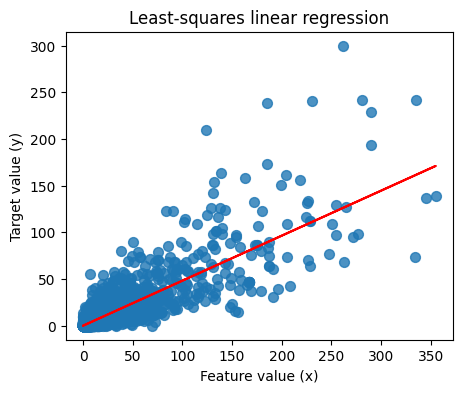

In [35]:
# Define X and y
X = in_df[['Awards Nominated For']]
y = in_df['Awards Received']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Logistic regression

In [39]:
X = in_df.drop(columns = ['Awards Nominated For', 'winner'], axis = 1)
y = in_df['winner'] # using the binary output variable for logistic regression (1 or 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\LucyKnight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


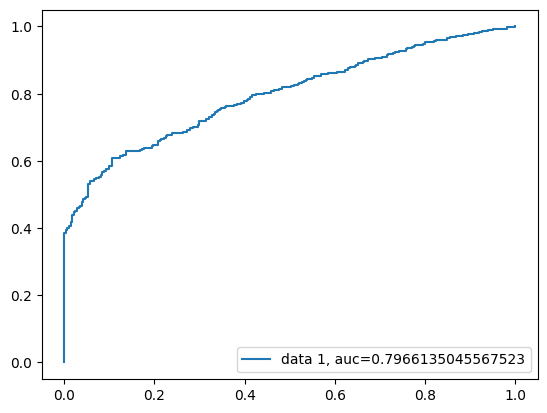

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=2000)

# fit the model with data
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Confusion matrix

In [41]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0, 284],
       [  0, 680]])

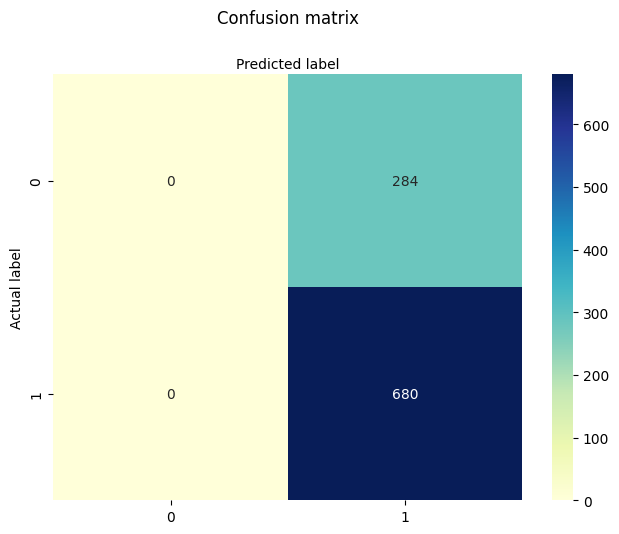

In [42]:
fig, ax = plt.subplots()
class_names = [1,0]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()